## 모델 개선하기
 * 여러가지 모델 사용해 보기
 * 데이터를 합쳐서 결측치 처리 해보기

In [317]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [318]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### 데이터 합치기(행)

In [319]:
all = pd.concat([train, test], axis=0, ignore_index=True)

In [320]:
all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [321]:
all.Survived.unique()

array([ 0.,  1., nan])

In [322]:
all.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


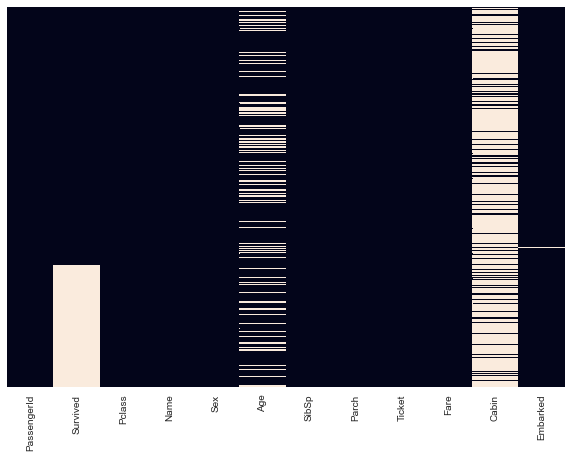

In [323]:
plt.figure(figsize=(10,7))
sns.heatmap(all.isnull(), yticklabels=False, cbar=False)  # cbar : colorbar를 그리지 않음.

### NA만 가진 열만 확인하기

In [324]:
all.isnull().any()

PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

### 생존자 사명자 비율 확인

In [325]:
all['Survived'].value_counts() / all['Survived'].value_counts().sum()

0.0    0.616162
1.0    0.383838
Name: Survived, dtype: float64

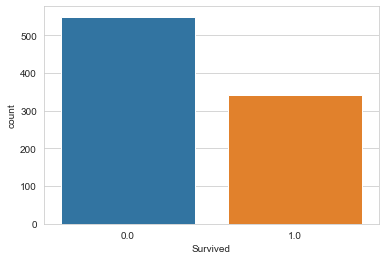

In [326]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=all)

### 남녀의 생존자

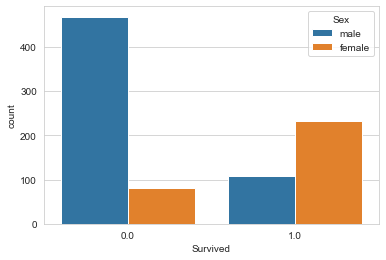

In [327]:
sns.countplot(x='Survived', hue='Sex', data=all)

In [328]:
print( all['Survived'][all['Sex']=='female'].value_counts() ) # 여성의 생존자와 사망자
print( all['Survived'][all['Sex']=='male'].value_counts() )   # 남성의 생존자와 사망자

1.0    233
0.0     81
Name: Survived, dtype: int64
0.0    468
1.0    109
Name: Survived, dtype: int64


### PClass에 따른 생존자의 수는 얼마나 될까?

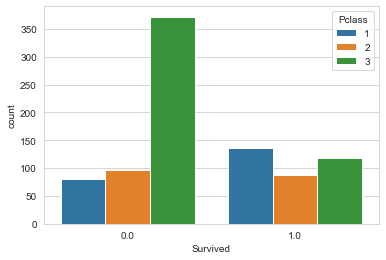

In [329]:
sns.countplot(x='Survived', hue='Pclass',data=all)

### 나이(Age)에 대해 살펴보자

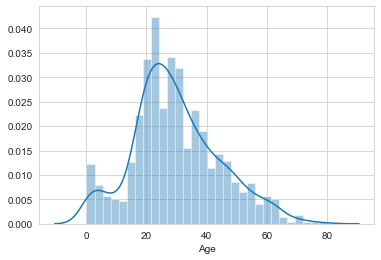

In [330]:
sns.distplot(all['Age'], bins=30)  # 에러 발생. 결측치 때문에

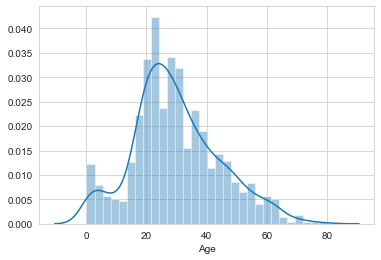

In [331]:
# bins : argument for matplotlib hist(), or None, optional
sns.distplot(all['Age'].dropna(), bins=30)

### PClass와 Age의 관계 알아보기

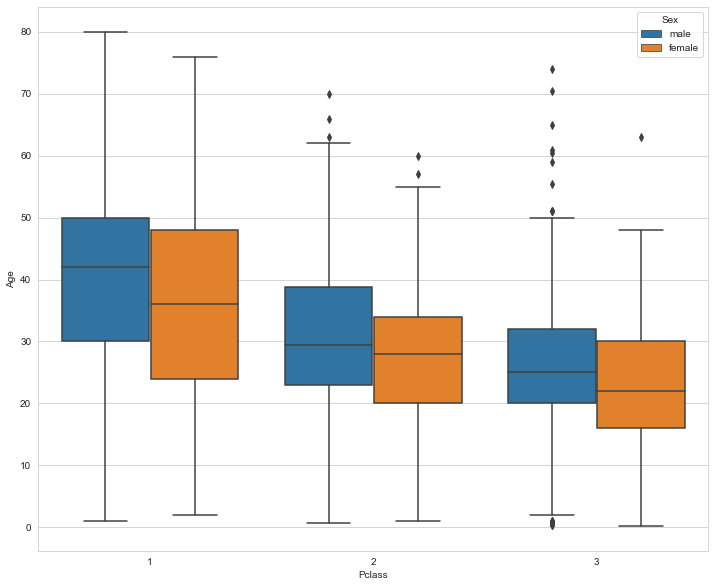

In [332]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=all)

* 나이가 많을 수록 1,2,3 등급으로 분포되어 있다.

### 결측치 처리

In [333]:
all['Age'] = all['Age'].fillna(all['Age'].mean())

## 해보기 
all['Fare'] = all['Fare'].fillna(all['Fare'].mean())

val_Embarked = all['Embarked'].value_counts() 
print(val_Embarked)

# all = all.fillna({"Embarked": "S"})
all['Embarked'] = all['Embarked'].fillna('S')

S    914
C    270
Q    123
Name: Embarked, dtype: int64


In [334]:
print(all.isnull().sum())

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64


### 라벨 인코딩 및 자료형 변환

In [335]:
all['Sex'] = all['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
all['Embarked'] = all['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [336]:
## 나이에 대한 int 처리
all['Age'] = all['Age'].astype('int')

In [337]:
all.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,1
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,0


### 나이대별 구분

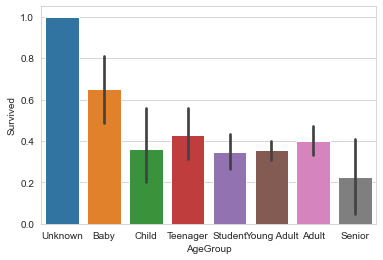

In [338]:
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]  # 나이대 구분
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 
          'Student', 'Young Adult', 'Adult', 'Senior']
all['AgeGroup'] = pd.cut(all["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=all)
plt.show()

### Cabin Feature 확인

In [339]:
all["CabinBool"] = (all["Cabin"].notnull().astype('int'))

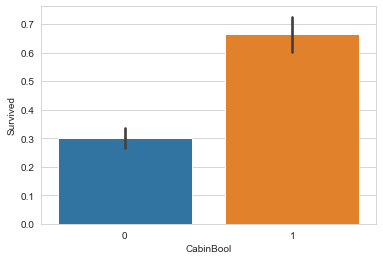

In [340]:
sns.barplot(x="CabinBool", y="Survived", data=all)

In [341]:
all["CabinBool"].value_counts()

0    1014
1     295
Name: CabinBool, dtype: int64

### Feature Drop하기

In [342]:
all = all.drop(['Cabin'], axis = 1)
all = all.drop(['Ticket'], axis = 1)

### Name Feature

In [343]:
all['Title'] = all.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(all['Title'], all['Sex'])

Sex,0,1
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [344]:
all['Title'] = all['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
all['Title'] = all['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
all['Title'] = all['Title'].replace('Mlle', 'Miss')
all['Title'] = all['Title'].replace('Ms', 'Miss')
all['Title'] = all['Title'].replace('Mme', 'Mrs')

all[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


### FamilySize Feature 생성

In [345]:
all['FamilySize'] = all['SibSp'] + all['Parch'] + 1
all["NameLength"] = all["Name"].apply(lambda x: len(x))

In [346]:
all.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title,FamilySize,NameLength
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22,1,0,7.2500,0,Student,0,Mr,2,23
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71.2833,1,Adult,1,Mrs,2,51
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26,0,0,7.9250,0,Young Adult,0,Miss,1,22


In [347]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}

all['Title'] = all['Title'].map(title_mapping)
all['Title'] = all['Title'].fillna(0)

In [348]:
all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title,FamilySize,NameLength
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22,1,0,7.2500,0,Student,0,1,2,23
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71.2833,1,Adult,1,3,2,51
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26,0,0,7.9250,0,Young Adult,0,2,1,22
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,53.1000,0,Young Adult,1,3,2,44
4,5,0.0,3,"Allen, Mr. William Henry",1,35,0,0,8.0500,0,Young Adult,0,1,1,24


In [349]:
# fill missing age with mode age group for each title
mr_age = all[all["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = all[all["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = all[all["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = all[all["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = all[all["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = all[all["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

In [350]:
for x in range(len(all["AgeGroup"])):
    if all["AgeGroup"][x] == "Unknown":
        all["AgeGroup"][x] = age_title_mapping[all["Title"][x]]

In [351]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
all['AgeGroup'] = all['AgeGroup'].map(age_mapping)
all = all.drop(['Age'], axis = 1)

In [352]:
all = all.drop(['Name'], axis = 1)               
all.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title,FamilySize,NameLength
0,1,0.0,3,1,1,0,7.2500,0,4.0,0,1,2,23
1,2,1.0,1,0,1,0,71.2833,1,6.0,1,3,2,51
2,3,1.0,3,0,0,0,7.9250,0,5.0,0,2,1,22
3,4,1.0,1,0,1,0,53.1000,0,5.0,1,3,2,44
4,5,0.0,3,1,0,0,8.0500,0,5.0,0,1,1,24


### Fare 피처 생성

In [353]:
#fill in missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(all["Fare"])):
    if pd.isnull(all["Fare"][x]):
        pclass = all["Pclass"][x] #Pclass = 3
        all["Fare"][x] = round(all[all["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
all['FareBand'] = pd.qcut(all['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
all = all.drop(['Fare'], axis = 1)

In [354]:
all.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FamilySize,NameLength,FareBand
0,1,0.0,3,1,1,0,0,4.0,0,1,2,23,1
1,2,1.0,1,0,1,0,1,6.0,1,3,2,51,4
2,3,1.0,3,0,0,0,0,5.0,0,2,1,22,2
3,4,1.0,1,0,1,0,0,5.0,1,3,2,44,4
4,5,0.0,3,1,0,0,0,5.0,0,1,1,24,2


### 데이터 나누기

In [355]:
a = len( all.loc[ (all['Survived']==0) | (all['Survived']==1) , :  ] )
b = len( all.loc[ (all['Survived']!=0) & (all['Survived']!=1) , :  ] )
a, b

(891, 418)

In [356]:
train = all.loc[ (all['Survived']==0) | (all['Survived']==1) , :  ]
test = all.loc[ (all['Survived']!=0) & (all['Survived']!=1) , :  ]

In [357]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FamilySize,NameLength,FareBand
0,1,0.0,3,1,1,0,0,4.0,0,1,2,23,1
1,2,1.0,1,0,1,0,1,6.0,1,3,2,51,4
2,3,1.0,3,0,0,0,0,5.0,0,2,1,22,2
3,4,1.0,1,0,1,0,0,5.0,1,3,2,44,4
4,5,0.0,3,1,0,0,0,5.0,0,1,1,24,2


In [359]:
# 'Name', 'Ticket' =>  문자포함
sel = ['PassengerId', 'Pclass', 'Sex', 'AgeGroup', 
       'SibSp', 'SibSp','Parch', 'Embarked', 'CabinBool', 'Title', 'FamilySize' ]

# 학습에 사용될 데이터 준비 X_train, y_train
X_train = train[sel]
y_train = train['Survived']
X_test = test[sel]

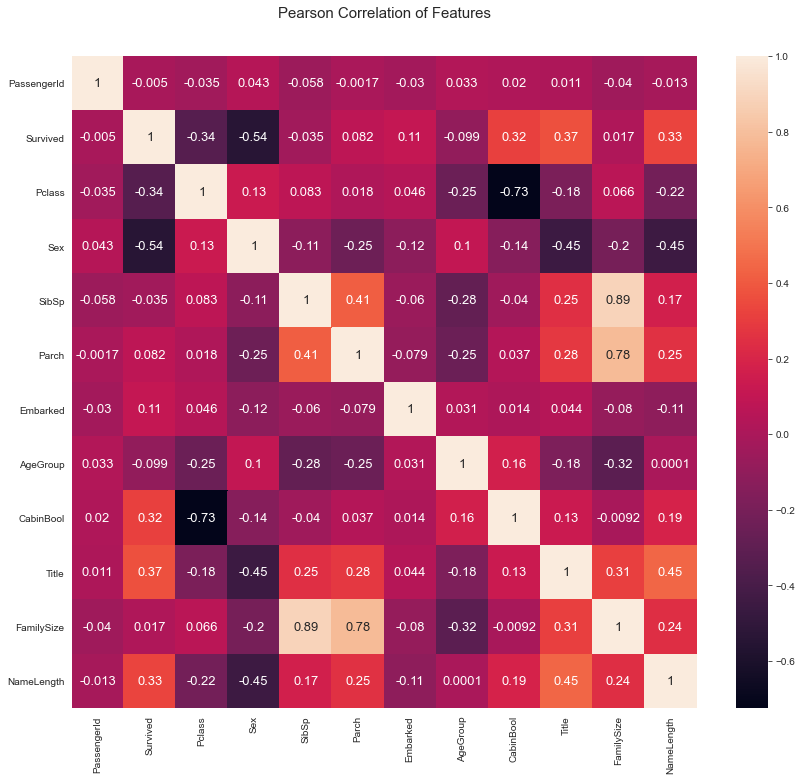

In [360]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.corr(), annot=True, annot_kws={"size": 13})

In [361]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Random Forest
from sklearn.ensemble import RandomForestClassifier
# import lightgbm as lgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [362]:
X = train.drop(['Survived', 'PassengerId'], axis=1)
y = train["Survived"]

print(X.shape, y.shape)

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state = 0)

(891, 11) (891,)


In [363]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pclass      891 non-null    int64   
 1   Sex         891 non-null    int32   
 2   SibSp       891 non-null    int64   
 3   Parch       891 non-null    int64   
 4   Embarked    891 non-null    int32   
 5   AgeGroup    891 non-null    float64 
 6   CabinBool   891 non-null    int32   
 7   Title       891 non-null    int64   
 8   FamilySize  891 non-null    int64   
 9   NameLength  891 non-null    int64   
 10  FareBand    891 non-null    category
dtypes: category(1), float64(1), int32(3), int64(6)
memory usage: 67.2 KB


### 의사결정트리

In [364]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred = tree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

81.56


In [369]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

83.24


In [370]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

79.89


In [371]:
models = pd.DataFrame({
    'Model': ['KNN', 'Random Forest', 'Decision Tree',],
    'Score': [acc_knn, acc_randomforest, acc_decisiontree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,83.24
2,Decision Tree,81.56
0,KNN,79.89


In [373]:
test.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FamilySize,NameLength,FareBand
891,892,NaN,3,1,0,0,2,5.0,0,1,1,16,1
892,893,NaN,3,0,1,0,0,6.0,0,3,2,32,1
893,894,NaN,2,1,0,0,2,7.0,0,1,1,25,2
894,895,NaN,3,1,0,0,0,5.0,0,1,1,16,2
895,896,NaN,3,0,1,1,0,4.0,0,3,3,44,2


In [381]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(X_test)
y_pred = y_pred.astype(int)
#set the output as a dataframe and convert to csv file named submission.csv
sub = pd.read_csv("gender_submission.csv")
sub['Survived'] = y_pred 
sub.to_csv('multimodel_rf_01.csv', index=False)